<a href="https://colab.research.google.com/github/yuu19/advanced_data_lecture/blob/main/10%E5%9B%9E%E7%9B%AE%E8%AC%9B%E7%BE%A9_%E6%B7%B1%E5%B1%A4%E5%AD%A6%E7%BF%92%E5%85%A5%E9%96%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Do not forget to make a copy before you start!

## **<font color='crimson'> Deadline: 2023/07/13 12:00:00 </font>**


## How to assign your weekly task to Google classroom

- **Recommended:**

  -  Once you copy the task to your own driver, the task colab file is in the [Colab Notebook] folder in you google driver.
  -  Just upload the task **ipynb** file to the Google Classroom.

  - Do not forget to save your colab file before uploading.


- Another way:


- 1. Download the colab file using **'File - download - .ipynb'** in the menu bar.

- 2. You will get a ipynb file in your local laptop, then upload the file to the Google Classroom.



In [ ]:
import numpy as np
import torch

###<font color='crimson'>[Task 1] Extension of the `Race` class</font>

We have made a class `Race` in the lecture.

Please make a simple extension.

1. The initial values for the `self.speed_turtle` and `self.speed_rabbit` are fixed for the previous code. Please modify the class that we can input the speed for the turtle and rabbit.

1. Then Try another 30 loops and record the position of rabbit and turtle for each loop.

In [ ]:
# Task 1
#元のクラス
class Race:
  def __init__(self, init1=0, init2=5): # initialze
    self.rabbit_current_position = init1
    self.turtle_current_position = init2
    self.speed_rabbit = 3
    self.speed_turtle = 1

    self.counter = 0
    self.overtook = False

  def one_step(self):
    self.rabbit_current_position += self.speed_rabbit
    self.turtle_current_position += self.speed_turtle

    print('Current Position of Rabbit is {}.'.format(self.rabbit_current_position), end='//')
    print('Current Position of Turtle is {}.'.format(self.turtle_current_position))

    self.check()
    self.counter += 1

  def check(self):
    if self.rabbit_current_position >= self.turtle_current_position and self.overtook is False:
      print('The rabbit overtook the turtle! in the {}th step!'.format(self.counter))
      self.overtook = True

In [ ]:
#Raceクラスを継承
#継承についてはこのページを参照　https://atmarkit.itmedia.co.jp/ait/articles/2202/01/news034.html#override
class Race_speed_var(Race):
    #コンストラクタをオーバーロード
    def __init__(self, init1=0, init2=5, speed_rabbit=100, speed_turtle=10):
      super().__init__(init1=0, init2=0)
      self.speed_rabbit = speed_rabbit
      self.speed_turtle = speed_turtle

new_race = Race_speed_var()

for i in range(10):
  print("現在は{}回目".format(new_race.counter))
  new_race.one_step()


現在は0回目
Current Position of Rabbit is 100.//Current Position of Turtle is 10.
The rabbit overtook the turtle! in the 0th step!
現在は1回目
Current Position of Rabbit is 200.//Current Position of Turtle is 20.
現在は2回目
Current Position of Rabbit is 300.//Current Position of Turtle is 30.
現在は3回目
Current Position of Rabbit is 400.//Current Position of Turtle is 40.
現在は4回目
Current Position of Rabbit is 500.//Current Position of Turtle is 50.
現在は5回目
Current Position of Rabbit is 600.//Current Position of Turtle is 60.
現在は6回目
Current Position of Rabbit is 700.//Current Position of Turtle is 70.
現在は7回目
Current Position of Rabbit is 800.//Current Position of Turtle is 80.
現在は8回目
Current Position of Rabbit is 900.//Current Position of Turtle is 90.
現在は9回目
Current Position of Rabbit is 1000.//Current Position of Turtle is 100.


###<font color='crimson'>[Task 2]Design the neural network.</font>

Design a neural network which fulfill the following conditions:

1. It has 3 hidden layers which has 512, 256, 128 dimensions, respectively.

1. The activation function `relu` is used for the input layer -> 1st hidden layer, no activation function for the output layer. `tanh` is used for the remained layers.

1. Use batch normalization between 1st hidden layer and 2nd hidden layer.

You only need to define a `class` for this task.

In [ ]:
# Task 2
import matplotlib.pyplot as plt
from torch import nn
import torch
import torch.nn.functional as F

#5層からなるモデル(入力層、隠れ層:3, 出力層)
class NN5(nn.Module):
  def __init__(self, n_input, n_output):
    super().__init__()
    self.input_layer = nn.Linear(n_input, 512)
    self.hidden_layer_1 = nn.Linear(512, 256)
    self.hidden_layer_2 = nn.Linear(256, 128)
    self.output_layer = nn.Linear(128, n_output)
    self.bn0 = nn.BatchNorm1d(512)
    self.bn1 = nn.BatchNorm1d(256)

  def forward(self, x):
    x = F.relu(self.input_layer(x))
    x = self.bn0(x)
    x = F.tanh(self.hidden_layer_1(x))
    x = self.bn1(x)
    x = F.tanh(self.hidden_layer_2(x))
    x = self.output_layer(x)

    return x

###<font color='crimson'>[Task 3] Classification Problem</font>

Use the following dataset:

https://raw.githubusercontent.com/dgod1028/Research/main/data/AD_simu.csv

1. Train your neural network with the X_train and y_train.You may need some preprocessing for the data.

1. print accuracy precision, recall and f1 score for test data after traininng.

# **★Challenge Task★**

Designing and Training your model until you Beat the Random Forest!



In [ ]:
# Task 3
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/dgod1028/Research/main/data/AD_simu.csv')

from sklearn.model_selection import train_test_split

target = 'Clicked_AD'
pd.get_dummies(df)

X = df.drop(target, axis=1)
y = df[target]
X = torch.from_numpy(X.values).float()
y = torch.from_numpy(y.values).float()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)


lr = 1e-2; Epochs = 1000
model = NN5(X_train.shape[1], 1)

optim = torch.optim.Adam(model.parameters(), lr=lr)

criterion = nn.MSELoss()

losses = torch.zeros(Epochs)
torch.manual_seed(30)

for epoch in range(Epochs):
  fcst = model(X_train)
  loss = criterion(fcst.view(-1), y_train)
  loss.backward()
  optim.step()
  optim.zero_grad()
  losses[epoch] = loss.item()

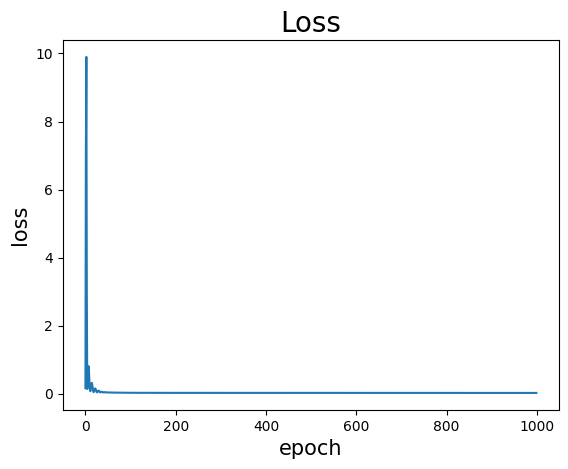

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
plt.plot(losses)
plt.title("Loss", fontsize=20)
plt.xlabel("epoch", fontsize=15)
plt.ylabel("loss", fontsize=15)
plt.show()

In [ ]:
#テストデータを使用
test_inputs = torch.tensor(X_test, dtype=torch.float32)
with torch.no_grad():
    predicted_probabilities = model(test_inputs).numpy()

# 予測確率を0.5を超えた場合広告をクリック、そうでない場合クリックしていないと判断
predicted_labels = np.where(predicted_probabilities >= 0.5, 1, 0)

# 各指標の計算
accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels)
recall = recall_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.9616
Precision: 0.5976
Recall: 0.2356
F1 Score: 0.3379


<ipython-input-10-04c23d49e093>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_inputs = torch.tensor(X_test, dtype=torch.float32)


In [ ]:
# Benchmark Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

preds = rf.predict(X_test)

def print_metrics(y_test, preds):
  print('Accuracy:{:.3f}'.format(accuracy_score(y_test, preds)))
  print('Precision:{:.3f}'.format(precision_score(y_test, preds)))
  print('Recall:{:.3f}'.format(recall_score(y_test, preds)))
  print('f1:{:.3f}'.format(f1_score(y_test, preds)))

print_metrics(y_test, preds)


Accuracy:0.960
Precision:0.556
Recall:0.240
f1:0.336


In [ ]:
# Start here
